Semana 14 - Análise do Mundo Real 


Pensei em fazer uma análise de vendas da Olist, as perguntas que pretendo responder são:

1 - Quais os 10 produtos mais vendidos a nível Nacional?
2 - Quais estados possuem mais pedidos? E quais produtos vende mais nesses estados?
3 - Qual o método de pagamento mais utilizado?
4 - Qual o ranking dos melhores vendedores para os Estados que mais possuem pedidos?


Irei utilizar as seguintes bases de Dados, localizada na pasta dados:

olist_sellers_dataset
olist_order_items_dataset
olist_orders_dataset
olist_order_payments_dataset

Importando as bibliotecas que serão utilizadas

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Lendo as bases de dados

In [5]:
df_pedidos = pd.read_csv('dados/olist_orders_dataset.csv')
df_itens_pedidos = pd.read_csv('dados/olist_order_items_dataset.csv')
df_pagamento = pd.read_csv('dados/olist_order_payments_dataset.csv')
df_vendedores = pd.read_csv('dados/olist_sellers_dataset.csv')

Primeiros Passos

Visualizar os arquivos para identificar os tratamentos que serão necessários. 

In [33]:
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
drop_pedidos = ['customer_id', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(drop_pedidos, axis=1)
df_pedidos

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54


In [8]:
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [9]:
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54


In [10]:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01
96474,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56
96475,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17
96476,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54


In [11]:
df_itens_pedidos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [12]:
df_itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
drop_itens_pedidos = ['order_item_id', 'shipping_limit_date']
df_itens_pedidos = df_itens_pedidos.drop(drop_itens_pedidos, axis=1)
df_itens_pedidos = df_itens_pedidos.dropna().reset_index(drop=True)


In [14]:
df_pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [15]:
df_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
drop_pagamento = ['payment_sequential', 'payment_installments']
df_pagamento = df_pagamento.drop(drop_pagamento, axis=1)
df_pagamento

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54


In [17]:
df_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [18]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [19]:
drop_vendedores = ['seller_zip_code_prefix', 'seller_city']
df_vendedores = df_vendedores.drop(drop_vendedores, axis=1)
df_vendedores

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,SP
...,...,...
3090,98dddbc4601dd4443ca174359b237166,PR
3091,f8201cab383e484733266d1906e2fdfa,SC
3092,74871d19219c7d518d0090283e03c137,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,RS


Depois que as bases foram tratadas, iniciei as conexões.

In [20]:
df_vendedores_pedidos = pd.merge(df_vendedores, df_itens_pedidos, on=['seller_id'], how='inner')
df_vendedores_pedidos

,seller_id,seller_state,order_id,product_id,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,SP,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,SP,0504447548229e075dea8441b37b1e2a,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89
...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,RS,7aa50aad959e4345b45b9732bc346a6e,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05
112646,e603cf3fec55f8697c9059638d6c8eb5,RS,aae373a2cc64ed2d1f262aa56e70b7e8,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96
112647,e603cf3fec55f8697c9059638d6c8eb5,RS,bc34d5b185152cb88b9f5db391dcd1cb,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05
112648,e603cf3fec55f8697c9059638d6c8eb5,RS,d1edb80f6670902ebbb11765b96873da,e891d4a9622cae3b9fc2ec558bda155b,27.00,12.48


In [21]:
df_vendedores_pedidos_itens = pd.merge(df_vendedores_pedidos, df_pedidos, on=['order_id'], how='inner')
df_vendedores_pedidos_itens

,seller_id,seller_state,order_id,product_id,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,3442f8959a84dea7ee197c632cb2df15,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-30 16:07:13
1,3442f8959a84dea7ee197c632cb2df15,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-06-02 16:57:44
2,3442f8959a84dea7ee197c632cb2df15,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-09-01 16:51:26
3,d1b65fc7debc3361ea86b5f14c68d2e2,SP,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-21 23:26:35
4,d1b65fc7debc3361ea86b5f14c68d2e2,SP,0504447548229e075dea8441b37b1e2a,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-06 17:03:59
...,...,...,...,...,...,...,...,...,...,...
110192,e603cf3fec55f8697c9059638d6c8eb5,RS,683076b91bcaf79259334f6aa80d41a3,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-02-07 11:32:53,2017-02-09 02:43:17,2017-02-13 11:09:14
110193,e603cf3fec55f8697c9059638d6c8eb5,RS,7aa50aad959e4345b45b9732bc346a6e,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-06 15:34:28
110194,e603cf3fec55f8697c9059638d6c8eb5,RS,aae373a2cc64ed2d1f262aa56e70b7e8,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-13 11:09:12
110195,e603cf3fec55f8697c9059638d6c8eb5,RS,bc34d5b185152cb88b9f5db391dcd1cb,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-10 16:37:06


In [22]:
base_venda_final = pd.merge(df_vendedores_pedidos_itens, df_pagamento, on=['order_id'], how='inner')
base_venda_final

,seller_id,seller_state,order_id,product_id,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,payment_type,payment_value
0,3442f8959a84dea7ee197c632cb2df15,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-30 16:07:13,credit_card,115.76
1,3442f8959a84dea7ee197c632cb2df15,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-06-02 16:57:44,credit_card,117.62
2,3442f8959a84dea7ee197c632cb2df15,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-09-01 16:51:26,credit_card,158.80
3,d1b65fc7debc3361ea86b5f14c68d2e2,SP,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-21 23:26:35,boleto,135.08
4,d1b65fc7debc3361ea86b5f14c68d2e2,SP,0504447548229e075dea8441b37b1e2a,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-06 17:03:59,boleto,221.79
...,...,...,...,...,...,...,...,...,...,...,...,...
115030,e603cf3fec55f8697c9059638d6c8eb5,RS,683076b91bcaf79259334f6aa80d41a3,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-02-07 11:32:53,2017-02-09 02:43:17,2017-02-13 11:09:14,boleto,43.05
115031,e603cf3fec55f8697c9059638d6c8eb5,RS,7aa50aad959e4345b45b9732bc346a6e,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-06 15:34:28,boleto,43.05
115032,e603cf3fec55f8697c9059638d6c8eb5,RS,aae373a2cc64ed2d1f262aa56e70b7e8,e891d4a9622cae3b9fc2ec558bda155b,27.00,10.96,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-13 11:09:12,credit_card,37.96
115033,e603cf3fec55f8697c9059638d6c8eb5,RS,bc34d5b185152cb88b9f5db391dcd1cb,e891d4a9622cae3b9fc2ec558bda155b,27.00,16.05,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-10 16:37:06,credit_card,43.05


Salvando a base de dados em CSV.

In [23]:
base_venda_final.to_csv('base_venda_final.csv', index=False)

Respondendo as Perguntas


C:\Users\Tainá\AppData\Local\Temp\ipykernel_16660\1288316315.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='count', data=produtos_mais_vendidos, palette='Greens')


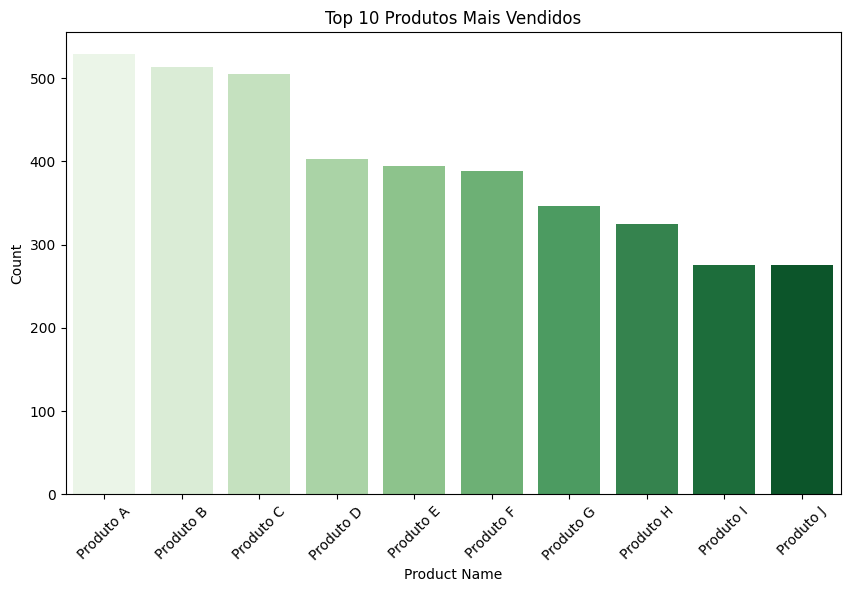

In [24]:
# 1 - Quais os produtos mais vendidos?
produtos_mais_vendidos = base_venda_final['product_id'].value_counts().head(10).reset_index()
produtos_mais_vendidos.columns = ['product_id', 'count']

# Atribuindo nomes fictícios aos produtos
produtos_nomes = {
    produtos_mais_vendidos.iloc[0]['product_id']: 'Produto A',
    produtos_mais_vendidos.iloc[1]['product_id']: 'Produto B',
    produtos_mais_vendidos.iloc[2]['product_id']: 'Produto C',
    produtos_mais_vendidos.iloc[3]['product_id']: 'Produto D',
    produtos_mais_vendidos.iloc[4]['product_id']: 'Produto E',
    produtos_mais_vendidos.iloc[5]['product_id']: 'Produto F',
    produtos_mais_vendidos.iloc[6]['product_id']: 'Produto G',
    produtos_mais_vendidos.iloc[7]['product_id']: 'Produto H',
    produtos_mais_vendidos.iloc[8]['product_id']: 'Produto I',
    produtos_mais_vendidos.iloc[9]['product_id']: 'Produto J',
}
produtos_mais_vendidos['product_name'] = produtos_mais_vendidos['product_id'].map(produtos_nomes)

plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='count', data=produtos_mais_vendidos, palette='Greens')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45)
plt.show()

C:\Users\Tainá\AppData\Local\Temp\ipykernel_16660\4028295575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_state', y='percentage', data=estados_com_mais_pedidos, palette='Greens_d')


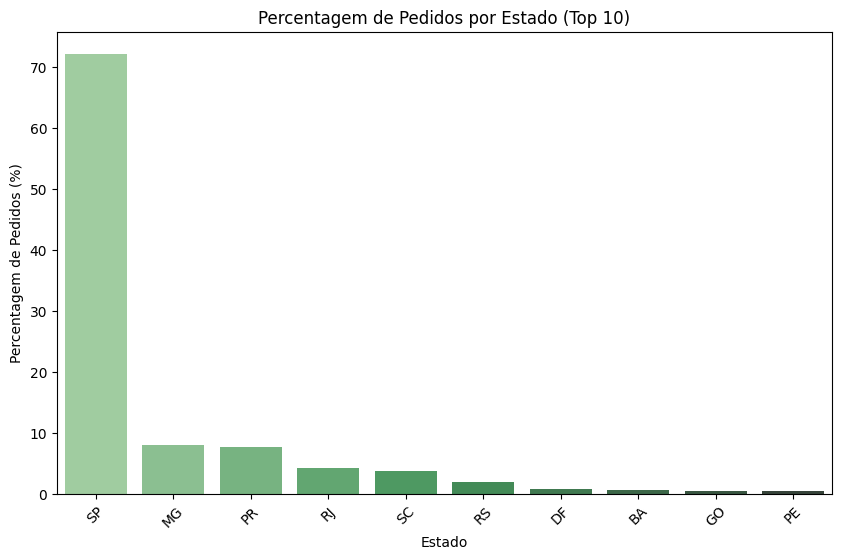

In [25]:
# 2 - Gráfico do produto mais vendido em cada um dos 10 estados com mais pedidos
estados_com_mais_pedidos = base_venda_final['seller_state'].value_counts().head(10).reset_index()
estados_com_mais_pedidos.columns = ['seller_state', 'count']

# Cálculo das porcentagens
total_pedidos = estados_com_mais_pedidos['count'].sum()
estados_com_mais_pedidos['percentage'] = (estados_com_mais_pedidos['count'] / total_pedidos) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_state', y='percentage', data=estados_com_mais_pedidos, palette='Greens_d')
plt.xlabel('Estado')
plt.ylabel('Percentagem de Pedidos (%)')
plt.title('Percentagem de Pedidos por Estado (Top 10)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Tainá\AppData\Local\Temp\ipykernel_16660\3220841450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='count', data=metodos_pagamento, palette='Greens')


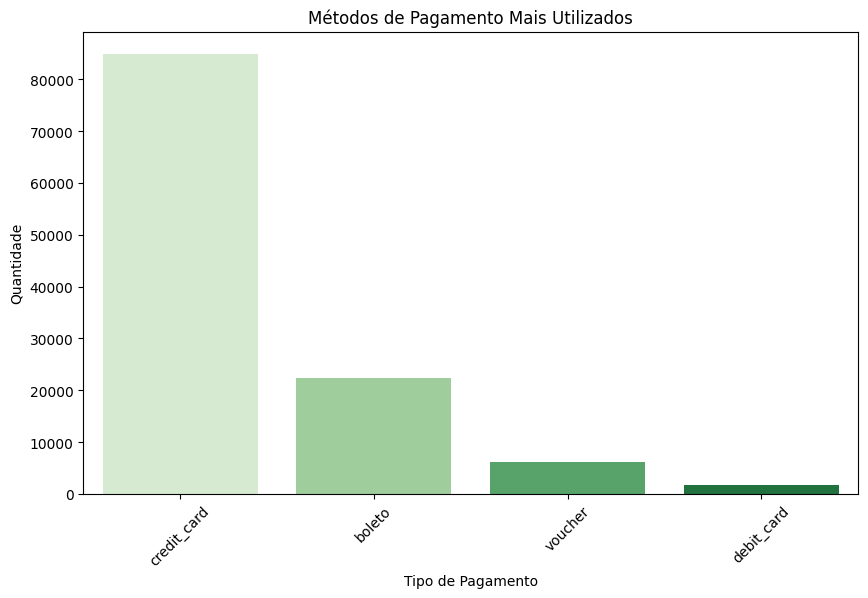

In [26]:
# 3 - Qual o método de pagamento mais utilizado?
metodos_pagamento = base_venda_final['payment_type'].value_counts().reset_index()
metodos_pagamento.columns = ['payment_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='count', data=metodos_pagamento, palette='Greens')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade')
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xticks(rotation=45)
plt.show()

top_10_estados = estados_com_mais_pedidos['seller_state'].tolist()


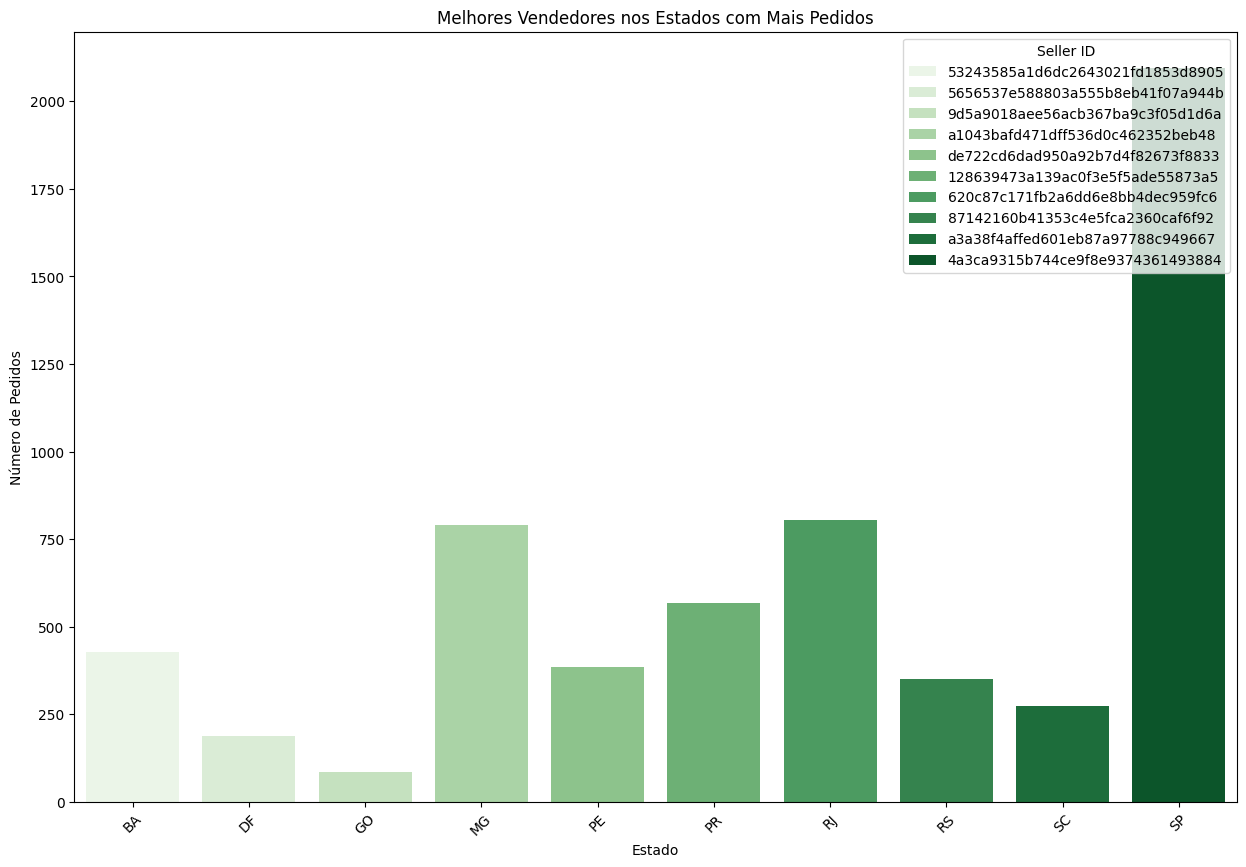

In [27]:
# 4 - Qual o ranking dos melhores vendedores para os Estados que mais possuem pedidos?

melhores_vendedores = base_venda_final.groupby(['seller_state', 'seller_id'])['order_id'].count().reset_index()
melhores_vendedores.columns = ['seller_state', 'seller_id', 'order_count']
melhores_vendedores = melhores_vendedores.sort_values(['seller_state', 'order_count'], ascending=[True, False])
melhores_vendedores_top = melhores_vendedores.groupby('seller_state').head(1)
melhores_vendedores_top = melhores_vendedores_top[melhores_vendedores_top['seller_state'].isin(top_10_estados)]

plt.figure(figsize=(15, 10))
sns.barplot(x='seller_state', y='order_count', hue='seller_id', data=melhores_vendedores_top, palette='Greens')
plt.xlabel('Estado')
plt.ylabel('Número de Pedidos')
plt.title('Melhores Vendedores nos Estados com Mais Pedidos')
plt.legend(title='Seller ID', loc='upper right')
plt.xticks(rotation=45)
plt.show()